enlace:  https://drive.google.com/drive/folders/146zkl9kEVC14NJewNH95S8gqipBzMxxX?usp=sharing

# Aplicaciones móviles: segmentación de usuarios y usuarias en función del comportamiento


# Índice del Proyecto

| Sección                       | Descripción                                                       |
|-------------------------------|-------------------------------------------------------------------|
| 1. [Introducción](#introducción)          | Breve descripción del proyecto y sus objetivos.                |
| 2. [Preprocesamiento de Datos](#Análisis)|Importación de librerías, carga de datos, revisión de duplicados, nulos y tipo de datos.   |
| 3. [Análisis Datos](#instalación)         |Análisis de cohorte y métricas.|
| 4. [Prueba de hipótesis](#resultados)     |Prueba de hipótesis           |
| 5. [Conclusiones](#conclusiones)          |Resumen de las conclusiones .       |


# Introducción

En el presente proyecto se realizará un análisis de los datos recopilados de la apliación Treasure, en la que los usuarios y las usuarias publican anuncios para vender cosas que ya no necesitan con el fin de definir grupos que difieren en términos de métricas del producto (tasa de retención, tiempo dedicado a la aplicación, frecuencia de ocurrencia de eventos, conversión en el evento de destino, contacts_show).

Se realizará en el análisis exploratorio de datos, segmentación de usuarios y prueba de hipótesis para encontrar diferencias de conversión entre usuarios que descargaron la aplicación mediante google y quienes lo hicieron mediante bing.

# Preprocesamiento de Datos

## Importación de librerías

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

## Carga de datos

In [137]:
data_dataset= pd.read_csv("mobile_dataset_us.csv")
data_sources = pd.read_csv("mobile_sources_us.csv") 


In [138]:
data_dataset.sample(10)


,event.time,event.name,user.id
29143,2019-10-18 20:29:32.792110,contacts_show,f5a3de3b-d38b-48e3-b831-2aced0a942b3
34525,2019-10-21 10:33:50.014833,contacts_show,9b835c74-8ede-4586-9f59-e5473aa48de2
19175,2019-10-15 09:29:44.788868,advert_open,83e055fe-fbcb-4c21-8384-57ac563bc0f2
67136,2019-11-01 09:26:18.323359,tips_show,21230dd9-2f7f-4b77-a436-43d4d10388e0
27110,2019-10-18 02:23:23.727378,tips_show,a4dcf49b-9f37-44b5-95f8-b66ce663179e
8413,2019-10-10 15:44:19.130685,tips_show,e47d0795-cd56-4299-a6b9-deead1fcec36
17954,2019-10-14 18:56:26.756931,tips_show,fe585541-43a9-4d56-8466-718856a4d195
1222,2019-10-07 16:07:47.939622,advert_open,65422b3b-8cd5-4649-b719-0bd945d92a24
10577,2019-10-11 16:44:11.190881,photos_show,410d222c-c334-4bf4-9157-60cd854299b4
58242,2019-10-29 09:13:57.907698,tips_show,a975aed8-0663-4c61-8516-807b66f7e006


In [139]:
data_sources.sample(5)

,userId,source
3923,b39de625-7ff9-440e-9928-f4829901a480,other
1040,8b1f8bc6-8a7f-4b44-a91a-04900a957940,bing
1801,24229d14-c33f-44cb-b2f5-a4b2af4c0808,bing
463,4e9b0d5e-ff67-4939-ad06-d4d49f570412,other
1676,e77a4039-452d-47e6-abdd-a7951fa2c7a4,bing


## Comprobando tipos de datos 

In [140]:
data_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [141]:
data_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


### Convirtiendo tipos de datos


In [142]:

data_dataset["event.name"].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [143]:
data_dataset["event.name"][data_dataset["event.name"]
                           == "show_contacts"] = "contacts_show"

In [144]:

data_sources["source"].unique()

array(['other', 'bing', 'google'], dtype=object)

In [145]:
# Convirtiendo a tipo de datos datatime

data_dataset["fecha_hora"] = pd.to_datetime(data_dataset["event.time"],format='%Y-%m-%d %H:%M:%S.%f')  # convirtiendo a datatime

data_dataset["fecha"] = data_dataset["fecha_hora"].dt.date  # extrayendo fecha

# Convirtiendo los eventos a tipo de datos categoricos

data_dataset["event.name"] = data_dataset["event.name"].astype("category")

# Convirtiendo las fuentes a tipo de datos categoricos

data_sources["source"] = data_sources["source"].astype("category")

## Renombrando columnas

In [146]:
data_sources = data_sources.rename(columns={"userId": "user.id"})

## Comprobando valores duplicados

In [147]:
data_dataset.duplicated().sum()

0

In [148]:
data_sources.duplicated().sum()

0

Usuarios únicos en los registros

In [149]:
data_dataset.nunique()

event.time    74197
event.name       15
user.id        4293
fecha_hora    74197
fecha            28
dtype: int64

No hay filas duplicadas en los datasets.

## Comprobando valores valores ausentes

In [150]:
data_dataset.isnull().sum()

event.time    0
event.name    0
user.id       0
fecha_hora    0
fecha         0
dtype: int64

In [151]:
data_sources.isnull().sum()

user.id    0
source     0
dtype: int64

# Análisis de Datos

## Periodo de tiempo de los datos

In [152]:
print(data_dataset["fecha_hora"].min())
print(data_dataset["fecha_hora"].max())

2019-10-07 00:00:00.431357
2019-11-03 23:58:12.532487


Los datos cubren desde 07/10/2019 al 03/11/2019

## Distribución de eventos en el tiempo

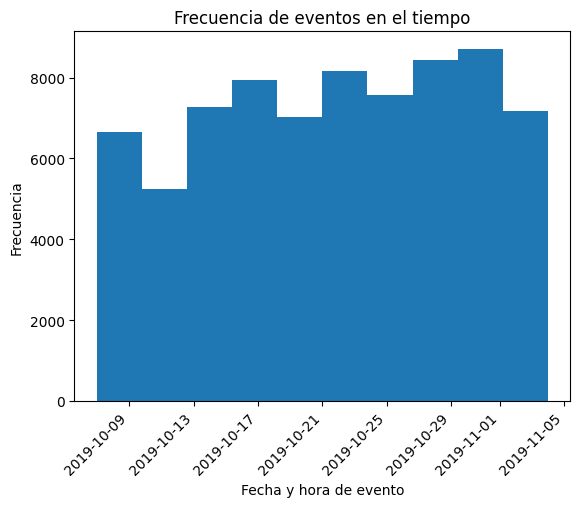

In [153]:
plt.hist(data_dataset["fecha_hora"])

# Agregar etiquetas y título
plt.xlabel('Fecha y hora de evento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de eventos en el tiempo')
plt.xticks(rotation=45, ha="right")

plt.show()

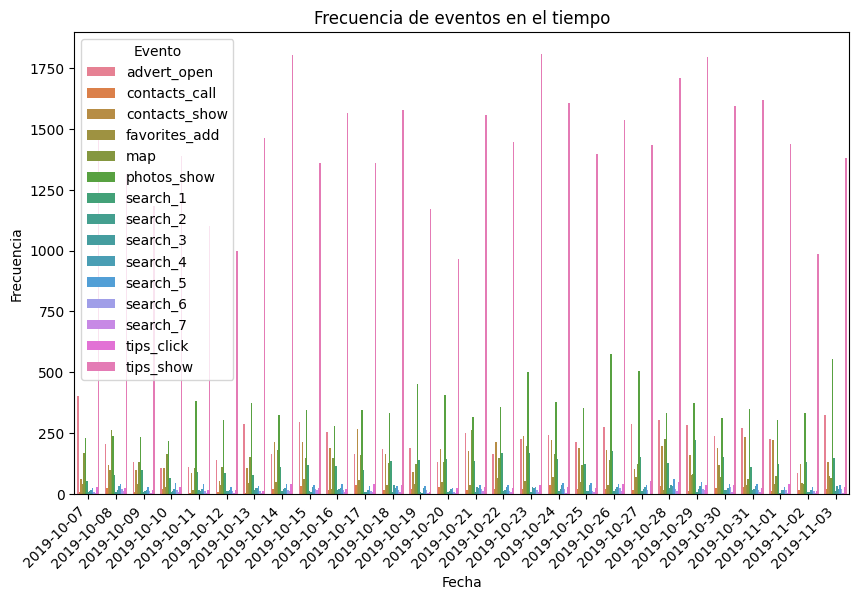

In [154]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Graficar el countplot con el parámetro hue
sns.countplot(x='fecha', hue='event.name', data=data_dataset)

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de eventos en el tiempo')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

plt.legend(title='Evento')  # Agregar leyenda

plt.show()

La distribución de los eventos se muestran uniformes a los largo de los días

## Distribución por tipo de evento

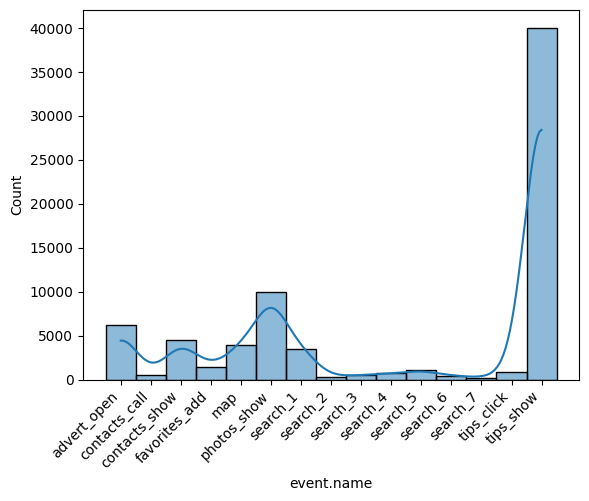

In [155]:
# Crear un gráfico de distribución
sns.histplot(data_dataset['event.name'], kde=True)
# Rotar las etiquetas del eje x 45
plt.xticks(rotation=45, ha="right")
# Mostrar el gráfico
plt.show()

## Usuarios según fuente 

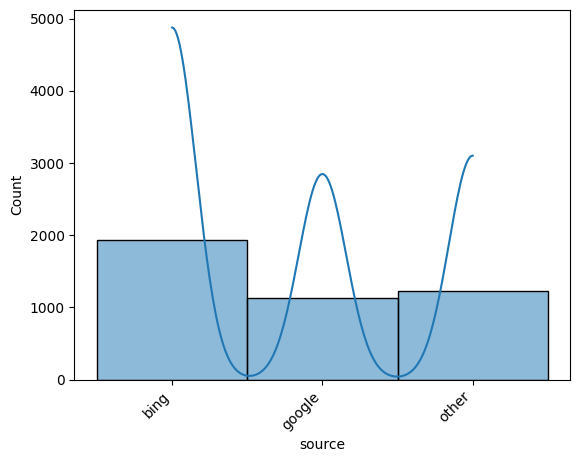

In [156]:
# Crear un gráfico de distribución
sns.histplot(data_sources['source'], kde=True)
# Rotar las etiquetas del eje x 45
plt.xticks(rotation=45, ha="right")
# Mostrar el gráfico
plt.show()

## Distribución por tipo de evento

In [157]:
# Uniendo tablas
merged_data = pd.merge(
    data_dataset, data_sources, on='user.id', how='left')
display(merged_data.head())

,event.time,event.name,user.id,fecha_hora,fecha,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:00.431357,2019-10-07,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:01.236320,2019-10-07,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07 00:00:02.245341,2019-10-07,bing
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:07.039334,2019-10-07,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07 00:00:56.319813,2019-10-07,bing


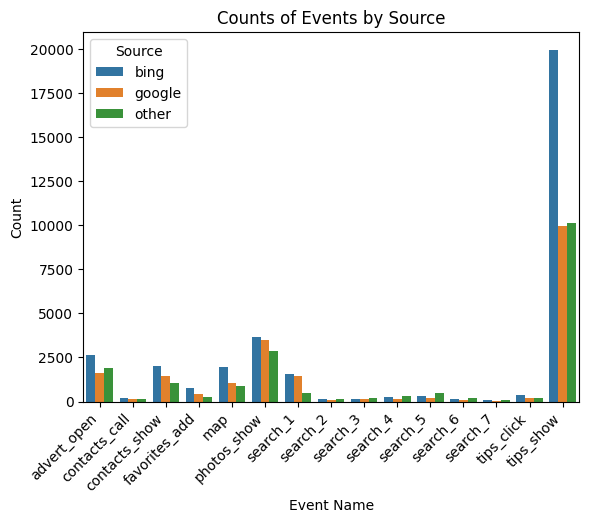

In [158]:
# Graficar el countplot con el parámetro hue
sns.countplot(x='event.name', hue='source', data=merged_data)
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Counts of Events by Source')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Source')
plt.show()

Aparentemente el source con mayor conversión es Bing, analizaremos con cohortes por comportamiento.


In [159]:

min_event_datetime = merged_data.groupby(['user.id'])['fecha_hora'].min()
min_event_datetime.name = 'min_event_datetime' 
events = merged_data.join(min_event_datetime, on='user.id') # Agregando columna con el primer evento de cada usuario


In [160]:
merged_data.groupby("source")["user.id"].nunique()

C:\Users\LUCIA\AppData\Local\Temp\ipykernel_11276\1043915629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby("source")["user.id"].nunique()


source
bing      1934
google    1129
other     1230
Name: user.id, dtype: int64

Agrupando por source, hay más usuarios por bing, que google y otros

## Frecuencia de eventos

In [161]:
data_dataset.groupby("event.name")["user.id"].count(
).sort_values(ascending=False).reset_index()

C:\Users\LUCIA\AppData\Local\Temp\ipykernel_11276\532970815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_dataset.groupby("event.name")["user.id"].count(


,event.name,user.id
0,tips_show,40055
1,photos_show,10012
2,advert_open,6164
3,contacts_show,4529
4,map,3881
5,search_1,3506
6,favorites_add,1417
7,search_5,1049
8,tips_click,814
9,search_4,701


## Cohortes por comportamiento

Se evaluará los cohortes por comportamiento según source, se identificará e iliminará usuarios en común.

In [162]:
events.head()

,event.time,event.name,user.id,fecha_hora,fecha,source,min_event_datetime
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:00.431357,2019-10-07,other,2019-10-07 00:00:00.431357
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:01.236320,2019-10-07,other,2019-10-07 00:00:00.431357
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07 00:00:02.245341,2019-10-07,bing,2019-10-07 00:00:02.245341
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07 00:00:07.039334,2019-10-07,other,2019-10-07 00:00:00.431357
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07 00:00:56.319813,2019-10-07,bing,2019-10-07 00:00:02.245341


Crearemos una nueva columna, time_to_event, para almacenar el tiempo entre el evento que estamos viendo y el primer evento del usuario/a:

In [163]:
# dividiendo usuarios por source

id_bing = events[events["source"] == "bing"]["user.id"].unique()
id_google = events[events["source"] == "google"]["user.id"].unique()
id_other = events[events["source"] == "other"]["user.id"].unique()

# obteniedo ids repetidos
# eliminando usuarios que ingresaron por dos o más fuentes
id_unique = np.unique(np.concatenate((id_bing, id_google, id_other)))

# eliminando usuarios que ingresaron por dos o más fuentes

events = events[events["user.id"].isin(id_unique)]

In [164]:
merged_data.groupby("source")["user.id"].nunique()

C:\Users\LUCIA\AppData\Local\Temp\ipykernel_11276\1043915629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby("source")["user.id"].nunique()


source
bing      1934
google    1129
other     1230
Name: user.id, dtype: int64

In [165]:
# Creando cohorte

events['event_week'] = pd.to_datetime(
    events['fecha_hora'].dt.date) - pd.to_timedelta(events['fecha_hora'].dt.dayofweek, unit='d')
events['min_event_week'] = pd.to_datetime( events['min_event_datetime'].dt.date ) - pd.to_timedelta(events['min_event_datetime'].dt.dayofweek, unit='d') 
events['cohort_lifetime'] = events['event_week'] - events['min_event_week']
events['cohort_lifetime'] = events['cohort_lifetime'] / np.timedelta64(1, 'W') 
events['cohort_lifetime'] = events['cohort_lifetime'].astype(int)

In [166]:
# FUNCIÒN

def printRetentionRate(df): 
  cohorts = ( df.groupby(['min_event_week', 'cohort_lifetime'], as_index=False) .agg({'user.id':'nunique'}) .sort_values(['min_event_week', 'cohort_lifetime']) ) 
  inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][ ['min_event_week', 'user.id'] ] 
  inital_users_count = inital_users_count.rename( columns={'user.id': 'cohort_users'} )
  cohorts = cohorts.merge(inital_users_count, on='min_event_week')
  cohorts['retention'] = cohorts['user.id'] / cohorts['cohort_users']
  print(cohorts.groupby(['cohort_lifetime'])['retention'].mean())
  cohorts.groupby(['cohort_lifetime'])['retention'].mean().plot.bar()


cohort_lifetime
0    1.000000
1    0.241094
2    0.133991
3    0.094796
Name: retention, dtype: float64


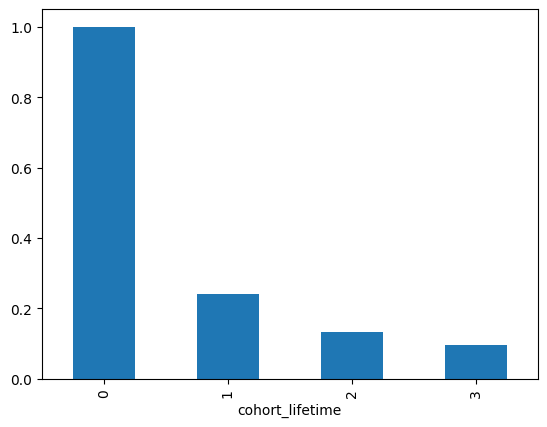

In [167]:
#comparando ratios


retencion_bing = events[events["source"] == "bing"]
retencion_google = events[events["source"] == "google"]

printRetentionRate(retencion_bing)




cohort_lifetime
0    1.000000
1    0.214629
2    0.135246
3    0.102113
Name: retention, dtype: float64


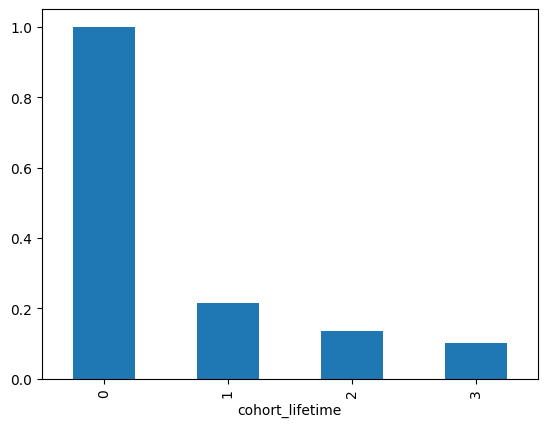

In [168]:
printRetentionRate(retencion_google)




cohort_lifetime
0    1.000000
1    0.239376
2    0.161151
3    0.126623
Name: retention, dtype: float64


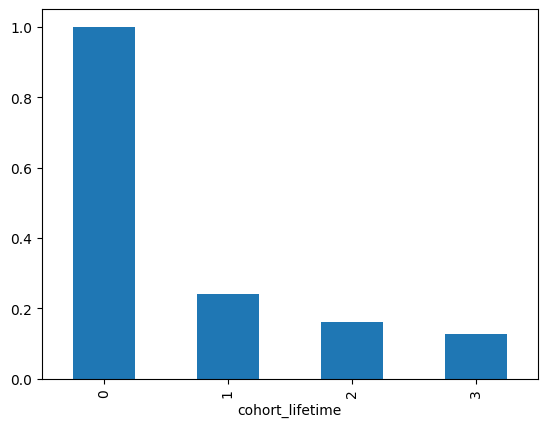

In [169]:
printRetentionRate(events[events["source"] == "other"])

Según los resultados el source con mayor tasa de retención es google.

# Prueba de hipótesis

Ho= No hay diferencia en la tasa de retención entre los usuarios que ingresaron por Google y los que ingresaron por Bing.
**
H1= Hay una diferencia en la tasa de retención entre los usuarios que ingresaron por Google y los que ingresaron por Bing.




In [170]:


retension_google = [1.000000, 0.241094, 0.133991,
                     0.094796]  # Datos de conversión de Google
retension_bing = [1.000000, 0.214629, 0.135246,
                   0.102113]  # Datos de conversión de Bing

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(retension_google, retension_bing)

print(f'Estadístico de prueba: {statistic}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay evidencia suficiente para decir que los grupos son significativamente diferentes.")

Estadístico de prueba: 7.5
Valor p: 1.0
No hay evidencia suficiente para decir que los grupos son significativamente diferentes.


# Conclusiones

Dado que el valor p es muy alto (mayor a 0.05), no se puede afirmar que haya una diferencia significativa en las retensiones entre los usuarios que entraron a través de Google y los que entraron a través de Bing. En otras palabras, basándonos en esta prueba, los datos no sugieren que uno de los grupos tenga un rendimiento significativamente mejor que el otro en términos de retención.

Sin embargo se pueden aprovechar datos resultantes como:

El evento con mayor frecuencia fue tips_show, y en 2do lugar photos_show
La fuente más utilizada por los usuarios fue bing.
Los eventos con mayor frecuencia se da en todo los sources.

Para armar una mejor estrategia de marketing.
